In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from pprint import pprint
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV

%matplotlib inline

In [2]:
# read in data
df = pd.read_csv("../../data/otto-group-product-classification-challenge/train.csv")
df.drop(columns=["id"], inplace=True)

In [14]:
# Split into features and label
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [15]:
# label encode string class values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [19]:
# use grid search to find best number of trees
clf = XGBClassifier(n_estimators=200)
max_depth_list = list(range(5, 9))
param_grid = {
    "max_depth": max_depth_list, 
}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=89)
cv = GridSearchCV(clf, param_grid, cv=kfold, scoring="neg_log_loss", n_jobs=-1)
t0 = time()
cv.fit(X, y)
print("[INFO] The time taken to search is: %f" % (time() - t0))

In [24]:
# print the process
print(
    "[INFO] The best score is: %f, where the best parameter combination is:"
    % (cv.best_score_)
)
pprint(cv.best_params_)
print()

means = cv.cv_results_["mean_test_score"]
stds = cv.cv_results_["std_test_score"]
params = cv.cv_results_["params"]
for mean, std, param in zip(means, stds, params):
    print("%f (+/- %f) with %s" % (mean, std, param))

[INFO] The best score is: -0.481953, where the best parameter combination is:
{'n_estimators': 200}

-0.481953 (+/- 0.010221) with {'n_estimators': 200}
-0.489892 (+/- 0.010890) with {'n_estimators': 300}
-0.504436 (+/- 0.011036) with {'n_estimators': 400}


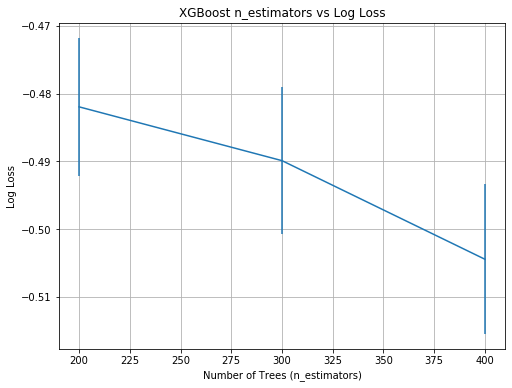

In [30]:
# visualize the process
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(max_depth_list, means, yerr=stds)
plt.xlabel("max_depth")
plt.ylabel("Log Loss")
plt.title("XGBoost max_depth vs Log Loss")
plt.grid()
plt.show()